<span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Sahte Haber Tespit Modeli</span>

- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Kütüphanelerin Yüklenmesi</span>](#1)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Keşif Amaçlı Veri Analizi </span>](#2)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Veri Temizleme  </span>](#3)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Veri Görselleştirme</span>](#4)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Modeli Eğitme </span>](#5)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#6CDDAC; ">Model2</span>](#6)


# Haber Nedir?

![](https://i.hizliresim.com/b6ck5vo.jpg)

Haber, güncel ve ilginç bir olayın olduğunca nesnel ve gerçeğe uygun bir biçimde sunulmasıdır. Haber metninde her türlü taraflı değerlendirmelerden ve söz oyunlarından uzak durulur. Metin kısa, haber dili de yalındır.

Bu haber tekniği son derece katı kurallara tabidir. Haberi yazan kişinin, sahip olduğu yaratıcılık alanı sınırlıdır.  Nitekim hatır için gazetecilik yapmak sakıncalıdır. Bir kısa ya da karmaşık haber metninde uyulması gereken kurallar şunlardır:

Güncel, haber yeni olmalı ve kolay iletilebilmelidir.
Konu ilginç olmalıdır.
Konu önemli olmalıdır.
Konu ilinti yaratmalıdır.
Konu kısa ve öz olmalıdır.

<a id = "1"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Kütüphanelerin Yüklenmesi</span></h1>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id = "2"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Keşif Amaçlı Veri Analizi</span></h1>

In [ ]:
df_fake = pd.read_csv('/content/drive/MyDrive/bitirme_2/newhaber/Fake.csv')
df_true = pd.read_csv('/content/drive/MyDrive/bitirme_2/newhaber/True.csv')

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Eksik Verilerimiz Yok

In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_true['real'] = 1
df_fake['real'] = 0

In [ ]:
df_true.head()

,title,text,subject,date,real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df_fake.head()

,title,text,subject,date,real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df.drop(columns= ['date'], axis =1, inplace= True)
df

,title,text,subject,real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [ ]:
df['combin'] = df['title'] + ' ' + df['text']
df.tail()

,title,text,subject,real,combin
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,0,10 U.S. Navy Sailors Held by Iranian Military ...


<a id = "3"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Veri Temizleme</span></h1>

In [ ]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
df['clean_title'] = df['title'].apply(preprocess)
df['clean_title'][0]

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script']

In [ ]:
df['clean_joined_title']=df['clean_title'].apply(lambda x:" ".join(x))

In [ ]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

In [ ]:
df['clean_final'] = df['combin'].apply(preprocess)
df['clean_joined_final']=df['clean_final'].apply(lambda x:" ".join(x))


In [ ]:
df['clean_joined_final'][5]

'white house congress prepare talks spending immigration west palm beach fla washington reuters white house said friday set kick talks week republican democratic congressional leaders immigration policy government spending issues need wrapped early new year expected flurry legislative activity comes republicans democrats begin set stage midterm congressional elections november president donald trump republican party eager maintain control congress democrats look openings wrest seats away senate house representatives wednesday trump budget chief mick mulvaney legislative affairs director marc short meet senate majority leader mitch mcconnell house speaker paul ryan republicans democratic counterparts senator chuck schumer representative nancy pelosi white house said followed weekend strategy sessions trump mcconnell ryan jan camp david presidential retreat maryland according white house senate returns work jan house jan congress passed short term government funding week taking christmas

<a id = "4"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Veri Görselleştirme</span></h1>

In [ ]:
sub_tf_df=df.groupby('real').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.real.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="real", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

In [ ]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Konularina Gore Haber Sayisi')
fig.show()

Haberlerimizin buyuk cogunlugu dunya ve politika olarak karsimiza cikmaktadir

*Gercek Haberlerde En Cok Kullanilan Kelimeler*

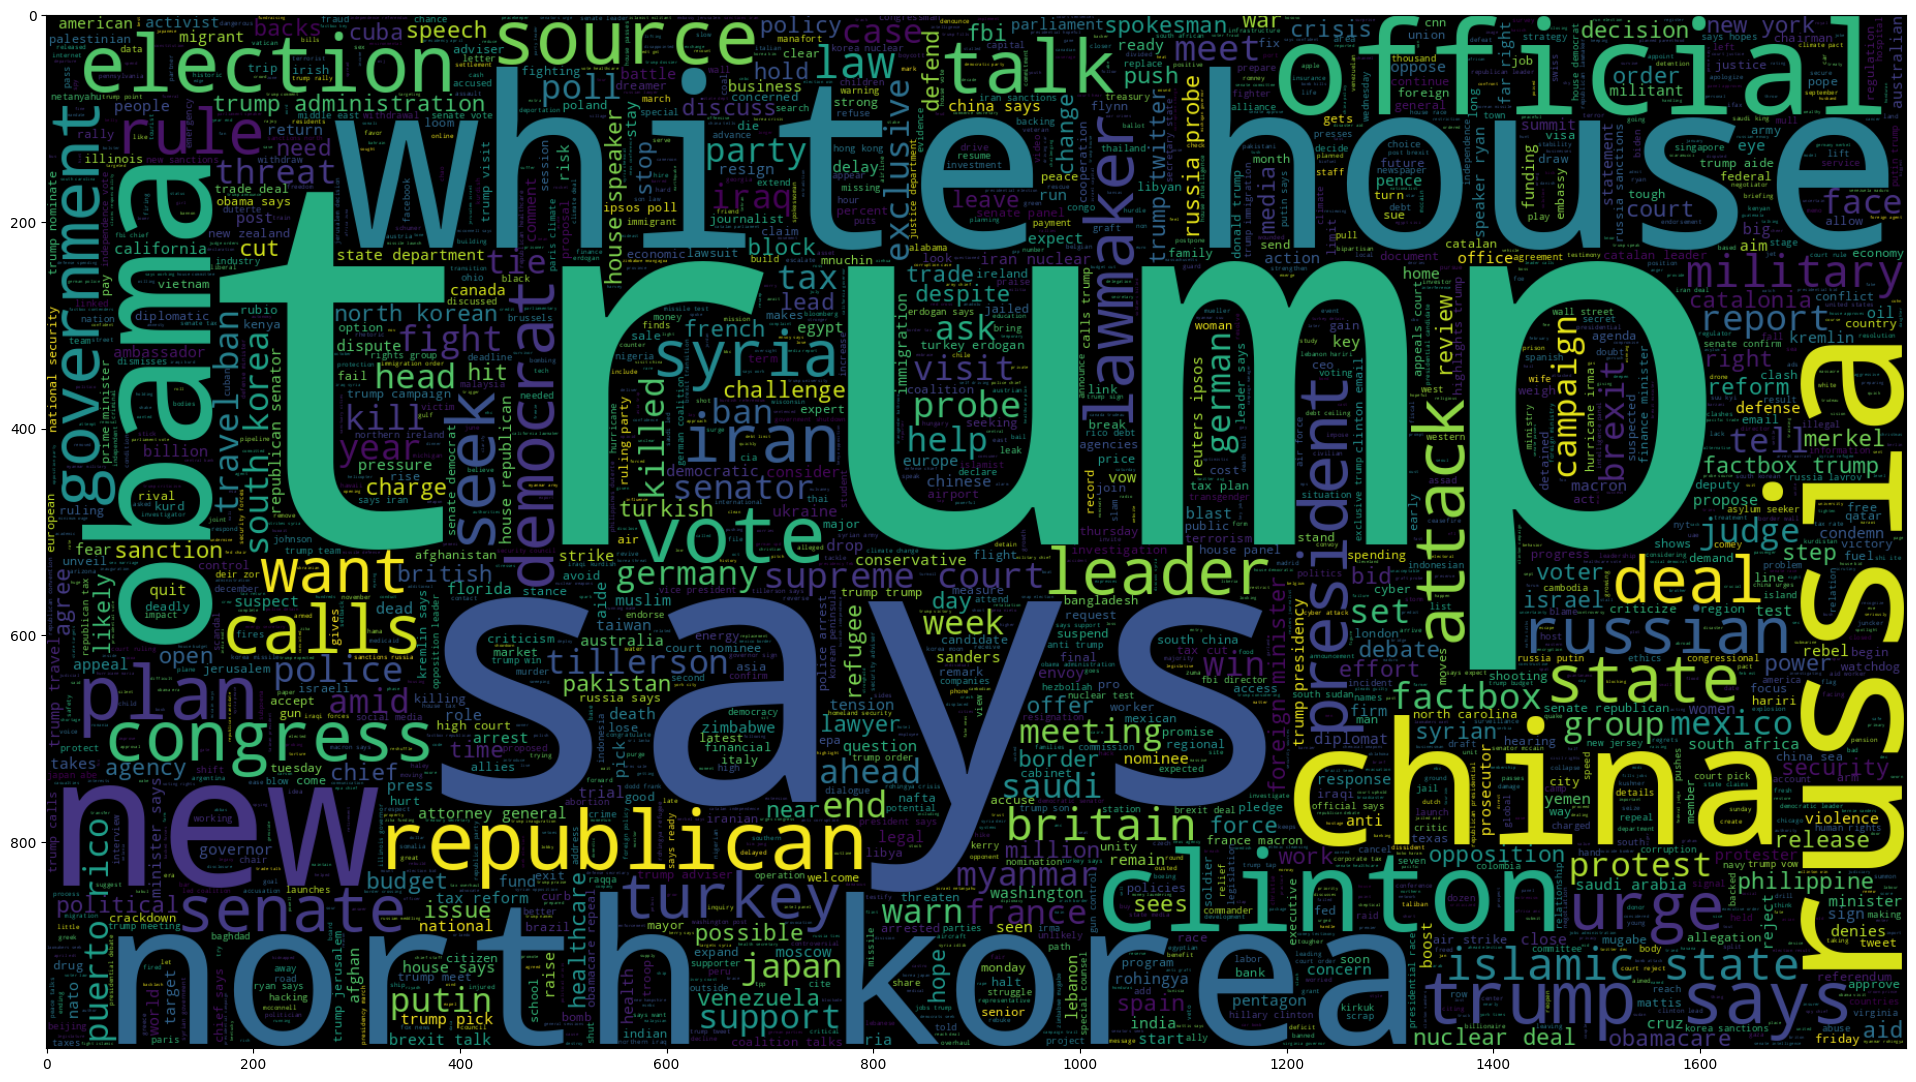

In [ ]:
plt.figure(figsize = (24,22))
wc = WordCloud(max_words = 2100 , width = 1800 , height = 1000 , stopwords = stop_words).generate(" ".join(df[df.real == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

*Sahte Haberlerde En Cok Kullanilan  Kelimeler*

In [ ]:
plt.figure(figsize = (24,22))
wc = WordCloud(max_words = 2100 , width = 1800 , height = 1000 , stopwords = stop_words).generate(" ".join(df[df.real == 0].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

Kelime Sayisinin Dagilimina Bakalim

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

In [ ]:
maxlen = -1
for doc in df.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("Bir Haber İçeriğindeki maksimum kelime sayısı =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_title], nbins = 50)
fig.show()

<a id = "5"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Modeli Eğitme</span></h1>

**Haberlerin Sadece Basliklarindan Yararlanilarak Dogru veya Yanlis Olduklarini Ogrenebilir miyiz?**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_title, df.real, test_size = 0.2, random_state = 42)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

model = LogisticRegression(C=3)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

In [ ]:
cm = confusion_matrix(list(y_test), predicted_value)
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

In [ ]:
maxlen = -1
for doc in df.clean_joined_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("Bir Haber İçeriğindeki maksimum kelime sayısı =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_text], nbins = 50)
fig.show()

<a id = "6"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#6CDDAC; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Model2</span></h1>

In [ ]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4,validation_split=0.1, batch_size=64, shuffle=True, callbacks=[early_stop])

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')